## Logistic Regression as a Single Neuran of a Neural Network

- Build a logistic regression classifier to recognize cats, where logistic regression represents a single nueron. 
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using gradient descent as the optimization algorithm

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split

In [20]:
def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array

In [21]:
def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    #X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test

In [22]:
# set the num_pix to 64
num_pix = 64
# load the train_set_x_orig, test_set_x_orig, train_set_y, test_set_y
raw_train_set_x, raw_test_set_x, train_set_y, test_set_y = create_train_test_data(num_pix,0.2)

In [23]:
m_train = raw_train_set_x.shape[0]
m_test = raw_test_set_x.shape[0]
num_px = [raw_train_set_x.shape[2], raw_train_set_x.shape[3]]
print('Number of training examples is ' + str(m_train))
print('Number of test examples is ' + str(m_test))
print('height and width of a training image is ' + str(num_px) )
print ("raw_train_set_x shape: " + str(raw_train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("raw_test_set_x shape: " + str(raw_test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples is 640
Number of test examples is 160
height and width of a training image is [64, 64]
raw_train_set_x shape: (640, 3, 64, 64)
train_set_y shape: (640,)
raw_test_set_x shape: (160, 3, 64, 64)
test_set_y shape: (160,)


In [24]:
'''
Reshape data so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)
'''

train_set_y = train_set_y.reshape(-1,1).T
test_set_y = test_set_y.reshape(-1,1).T

print ("Resahpe train_set_y shape to: " + str(train_set_y.shape))
print ("Reshape test_set_y shape to: " + str(test_set_y.shape))

Resahpe train_set_y shape to: (1, 640)
Reshape test_set_y shape to: (1, 160)


In [25]:
'''
Reshape the training and test data sets so that each image is flattened into single vectors of shape 
(num_px  ∗ num_px  ∗ 3, 1). 
Check the shapes for train_set_x_flatten and test_set_x_flatten.
'''

train_set_x_flatten = raw_train_set_x.reshape(raw_train_set_x.shape[0], -1).T
test_set_x_flatten = raw_test_set_x.reshape(raw_test_set_x.shape[0], -1).T

print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 640)
(12288, 160)


In [26]:
# Standardize the data
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [27]:
def sigmoid(z):
    
    s = 1/(1 + np.exp(-z))
    
    return s

In [28]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1), float)
    b = 0
   

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [29]:
'''
Implement forward propagation to calculate activation A and cost.
'''

def f_prop(w, b, X, Y):
    
    m = X.shape[1]  # compute the number of trainig data
    # FORWARD PROPAGATION (FROM X TO COST)
    z = np.dot(w.T, X) + b
    A = sigmoid(z)      # compute activation
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y)* np.log(1-A))  # compute cost
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return A, cost

In [30]:
'''
Implement backward propagation to compute gradients dw and db
'''

def back_prop(X, Y, A):
    # From backward propagation, we have
    # dL/dw1 = dL/dz * x1 -> dw1 = dz1 * x1 = (a1 - y1) * x1
    # where x1 is the first attribute of a data point.
    # We want dw to have same shape of w, therefore
    
    m = X.shape[1]
    dz = A - Y
    dw = (1/m)*np.dot(X,dz.T) # n * 1
    db = (1/m)*np.sum(dz)
   
    return dw, db

In [31]:
'''
Optimization
    - Initialized parameters.
    - Compute a cost function and its gradient.
    - Update the parameters using gradient descent.
    - The goal is to learn w and b by minimizing the cost function J. 
'''

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    dbs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        A, cost = f_prop(w, b, X, Y)
        dw, db = back_prop(X, Y, A)
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the costs every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            dbs.append(db)
            
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs, dbs

In [32]:
'''
Prediction

Implement the predict function:
    - Calculate A = sigmoid(w^T X_test + b)
    - Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5),
'''

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
   
    Y_prediction = np.array([1 if a > 0.5 else 0 for a in A[0]])
    Y_prediction = Y_prediction.reshape((1,-1))
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [33]:
'''
Regression Model

Implement the model function:
    - Y_prediction for predictions on the test set
    - Y_prediction_train for predictions on the train set
    - w, costs, grads for the outputs of optimize()
'''

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
       
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs, dbs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "b_grad": dbs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Run the regression model function to train your model.
- Set different `num_iterations` and `learning_rate`

In [34]:
# (iterations, learning_rate) = (5000, 0.0005)
num_iterations = 5000
learning_rate = 0.0005
d_5000 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations , learning_rate , print_cost = False)

train accuracy: 81.40625 %
test accuracy: 61.875 %


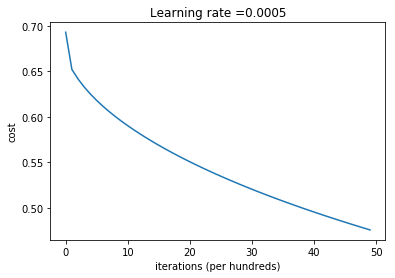

In [36]:
# Plot the cost function and the gradients.
costs = np.squeeze(d_5000['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_5000["learning_rate"]))
plt.show()

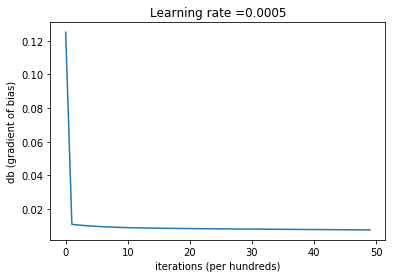

In [37]:
plot_db = d_5000['b_grad']
plt.plot(plot_db)
plt.ylabel('db (gradient of bias)')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_5000["learning_rate"]))
plt.show()

In [38]:
num_iterations = 2000
learning_rate = 0.005
d_2000 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations , learning_rate , print_cost = False)

train accuracy: 93.4375 %
test accuracy: 56.25 %


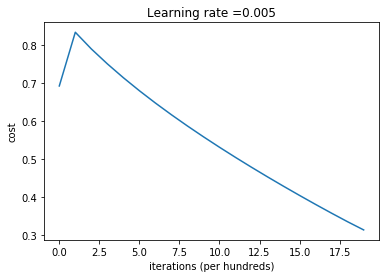

In [39]:
costs = np.squeeze(d_2000['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_2000["learning_rate"]))
plt.show()

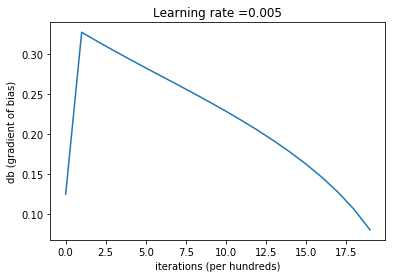

In [40]:
plot_db = d_2000['b_grad']
plt.plot(plot_db)
plt.ylabel('db (gradient of bias)')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_2000["learning_rate"]))
plt.show()

learning rate is: 0.005
number of iteraion is: 1500
train accuracy: 83.125 %
test accuracy: 50.625 %

-------------------------------------------------------

learning rate is: 0.0005
number of iteraion is: 1500
train accuracy: 72.65625 %
test accuracy: 64.375 %

-------------------------------------------------------



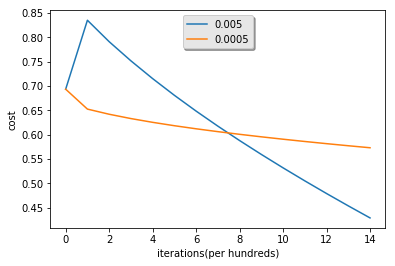

In [41]:
'''
Analysis

Comparing costs of b at learing rates 0.005 and 0.0005, respectively 
'''

learning_rates = [0.005,0.0005]  

models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    print ("number of iteraion is: 1500")
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations(per hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

learning rate is: 0.005
number of iteraion is: 1500
train accuracy: 83.125 %
test accuracy: 50.625 %

-------------------------------------------------------

learning rate is: 0.0005
number of iteraion is: 1500
train accuracy: 72.65625 %
test accuracy: 64.375 %

-------------------------------------------------------



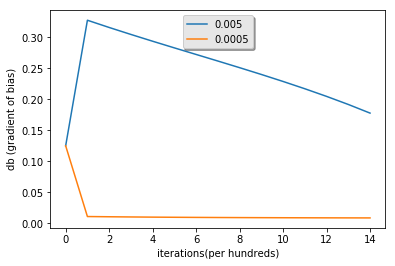

In [42]:
# Comparing gradients of b at learing rates 0.005 and 0.0005, respectively 
learning_rates = [0.005,0.0005]  

models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    print ("number of iteraion is: 1500")
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["b_grad"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('db (gradient of bias)')
plt.xlabel('iterations(per hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [43]:
# Load another data set to examine the performance of Logistic Regression 

def load_dataset(database_path):
    # open dataset 
    dataset_db = h5py.File(database_path, "r")
    
    
    datasets = {}
    for dataset in ["train", "dev", "test"]:
        
        # load the train set feautres (picuture)
        datasets[dataset] = {'X' : np.array(dataset_db[dataset + "_img"][:]),'Y' : np.array(dataset_db[dataset + "_labels"][:])}
    return datasets
    

In [44]:
car_data_set = load_dataset("./car_dataset.hdf5")

In [47]:
raw_car_train_x = car_data_set["train"]["X"]
raw_car_train_y = car_data_set["train"]["Y"]
raw_car_dev_x = car_data_set["dev"]["X"]
raw_car_dev_y = car_data_set["dev"]["Y"]
raw_car_test_x = car_data_set["test"]["X"]
raw_car_test_y = car_data_set["test"]["Y"]

print(raw_car_train_x.shape)
print(raw_car_train_y.shape)
print(raw_car_dev_x.shape)
print(raw_car_dev_y.shape)
print(raw_car_test_x.shape)
print(raw_car_test_y.shape)

(517, 64, 64, 3)
(517,)
(172, 64, 64, 3)
(172,)
(173, 64, 64, 3)
(173,)


In [49]:
car_train_y = raw_car_train_y.reshape(1,-1)
car_dev_y = raw_car_dev_y.reshape(1,-1)
car_test_y = raw_car_test_y.reshape(1,-1)

car_train_x_flatten = raw_car_train_x.reshape(raw_car_train_x.shape[0], -1).T
car_dev_x_flatten = raw_car_dev_x.reshape(raw_car_dev_x.shape[0], -1).T
car_test_x_flatten = raw_car_test_x.reshape(raw_car_test_x.shape[0], -1).T

print(car_train_y.shape)
print(car_dev_y.shape)
print(car_test_y.shape)
print(car_train_x_flatten.shape)
print(car_dev_x_flatten.shape)
print(car_test_x_flatten.shape)

(1, 517)
(1, 172)
(1, 173)
(12288, 517)
(12288, 172)
(12288, 173)


In [50]:
car_train_x = car_train_x_flatten/255.
car_dev_x = car_dev_x_flatten/255.
car_test_x = car_test_x_flatten/255.

In [51]:
num_iterations = 2000
learning_rate = 0.0005
d_car_train_test = model(car_train_x, car_train_y, car_test_x, car_test_y, num_iterations , learning_rate , print_cost = False)

train accuracy: 89.16827852998065 %
test accuracy: 85.54913294797687 %


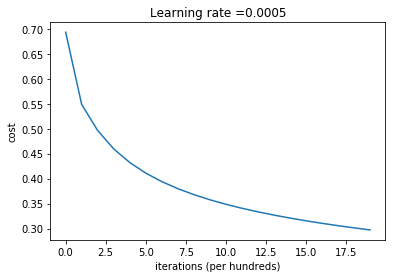

In [52]:
costs = np.squeeze(d_car_train_test['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_car_train_test["learning_rate"]))
plt.show()

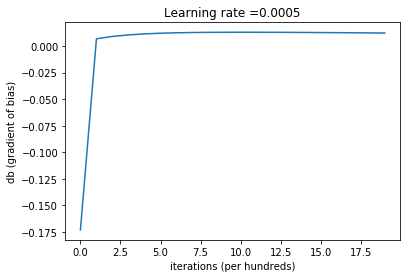

In [53]:
plot_db = d_car_train_test['b_grad']
plt.plot(plot_db)
plt.ylabel('db (gradient of bias)')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_car_train_test["learning_rate"]))
plt.show()

In [54]:
num_iterations = 2000
learning_rate = 0.005
d_car_train_dev = model(car_train_x, car_train_y, car_dev_x, car_dev_y, num_iterations , learning_rate , print_cost = False)

train accuracy: 97.48549323017409 %
test accuracy: 91.86046511627907 %


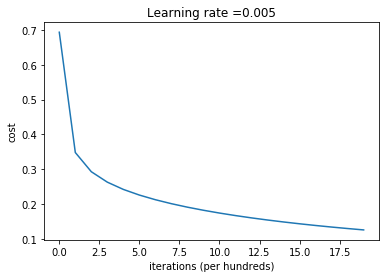

In [56]:
costs = np.squeeze(d_car_train_dev['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_car_train_dev["learning_rate"]))
plt.show()

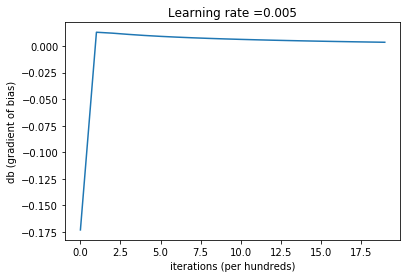

In [57]:
plot_db = d_car_train_dev['b_grad']
plt.plot(plot_db)
plt.ylabel('db (gradient of bias)')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_car_train_dev["learning_rate"]))
plt.show()

Accuracy report for car data set:

Using train-test data set:
train accuracy: 89.16827852998065 % test accuracy: 85.54913294797687 %

Using train-dev data set:
train accuracy: 97.48549323017409 %
test accuracy: 91.86046511627907 %